In [97]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [96]:
import os
print("Current Working Directory:", os.getcwd())


Current Working Directory: c:\Users\akshi\Downloads


In [10]:
!pip install missingno


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [12]:
!pip install --upgrade pip
!pip uninstall -y numpy
!pip install "numpy<2.0"

!pip install --upgrade catboost numba

  Using cached pip-25.0.1-py3-none-any.whl.metadata (3.7 kB)
Using cached pip-25.0.1-py3-none-any.whl (1.8 MB)



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: To modify pip, please run the following command:
C:\Users\akshi\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [15]:
#loading data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [16]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [17]:
df.shape

(7043, 21)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [20]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

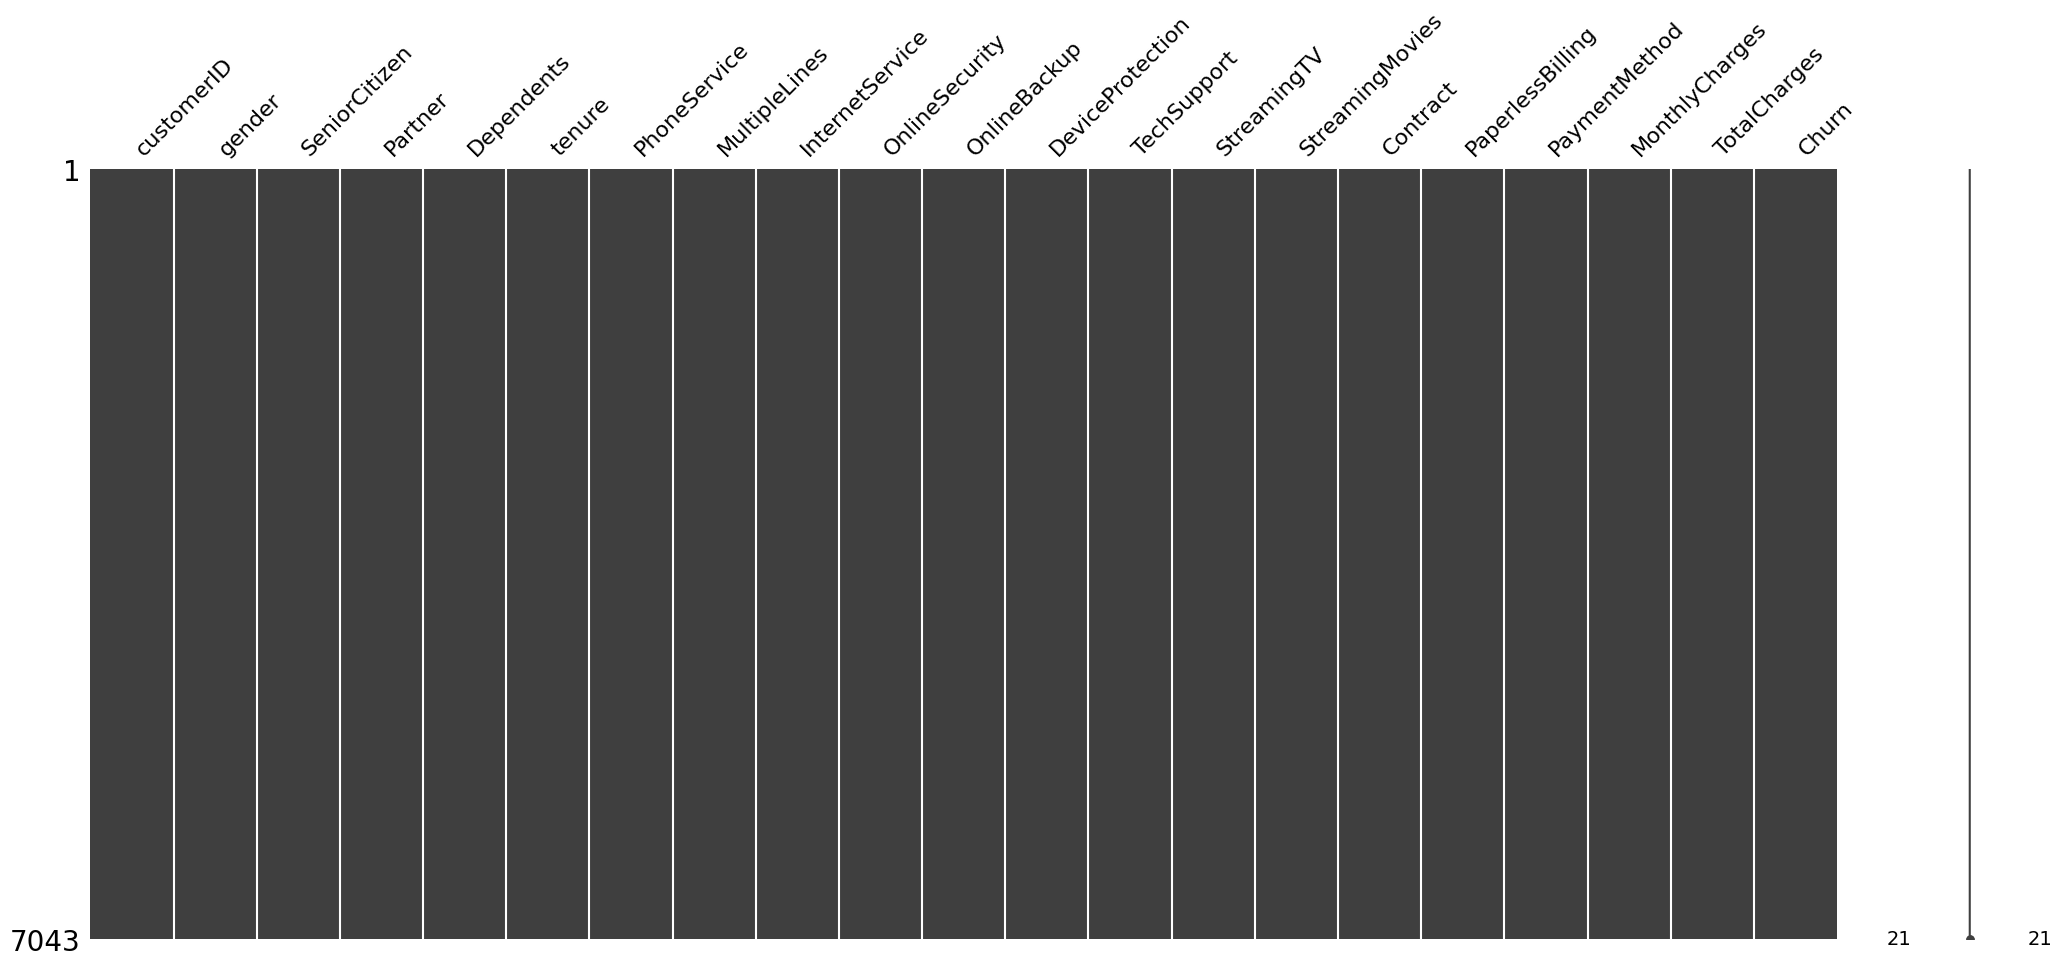

In [21]:
# Visualize missing values as a matrix
msno.matrix(df);

In [22]:
df = df.drop(['customerID'], axis = 1)
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [23]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [24]:
df[np.isnan(df['TotalCharges'])]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)           52.55           NaN    No  
753                Mailed check           20.25           NaN    No  
936                Mailed check           80.85           NaN    No  
1082               Mailed check           25.75           NaN    No  
1340    Credit card (automatic)           56.05           NaN    No  
3331               Mailed check           19.85           NaN    No  
3826               Mailed check           25.35           NaN    No  
4380               Mailed check           20.00           

In [25]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [26]:
df.fillna(df["TotalCharges"].mean())

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check           29.85   
1                  No               Mailed check           56.95   
2                 Yes               Mailed check           53.85   
3                  No  Bank transfer (automatic)           42.30   
4                 Yes           Electronic check           70.70   
...               ...                        ...             ...   
7038              Yes               Mailed check           84.80   
7039              Yes    Credit card (automatic)          103.20   
7040              Yes           Electronic check           29.60   
7041              Yes               Mailed check           74.40   
7042              Yes  Bank transfer (automatic)          105.65   

      TotalCharges Churn  
0            29.85    No  
1          1889.50    No  
2           108.15   Yes  
3          1840.75    No  
4           151.65   Yes  
...            ...   ...  
7038       1990.50    No  
7039       7362.90    No  
7040        346.45    No  
7041        306.60   Yes  
7042       6844.50    No  

[7032 rows x 20 columns]

In [27]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [28]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female            No     Yes         No       1           No   
1    Male            No      No         No      34          Yes   
2    Male            No      No         No       2          Yes   
3    Male            No      No         No      45           No   
4  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [29]:
df["InternetService"].describe(include=['object', 'bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [30]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000

In [31]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [32]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [33]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

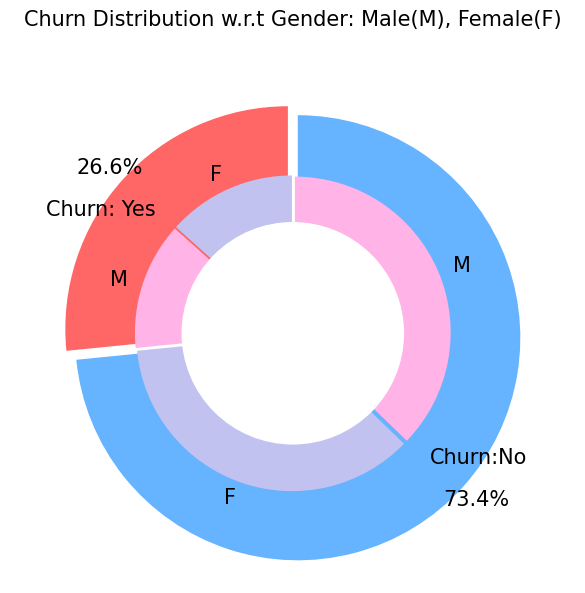

In [34]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [35]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [36]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [37]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [38]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [39]:
 df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       992
Fiber optic      No       910
No               No       717
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
Name: count, dtype: int64

In [40]:
df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       965
Fiber optic      No       889
No               No       690
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
Name: count, dtype: int64

In [41]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

In [42]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [43]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [44]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [45]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [46]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="PaperlessBilling",  title="<b>Chrun distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [47]:
fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [48]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="PhoneService", title="<b>Chrun distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

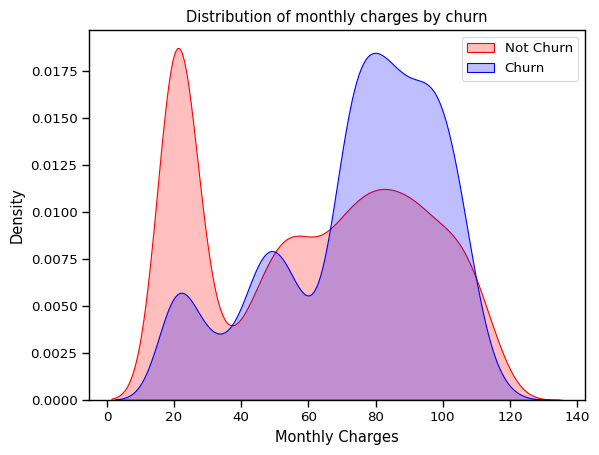

In [49]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

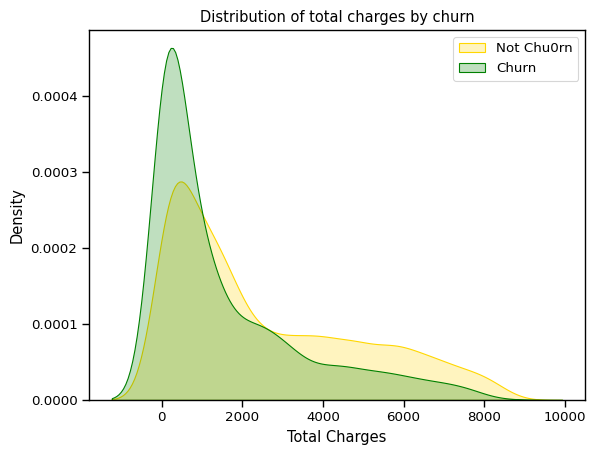

In [50]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

In [51]:
fig = px.box(df, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

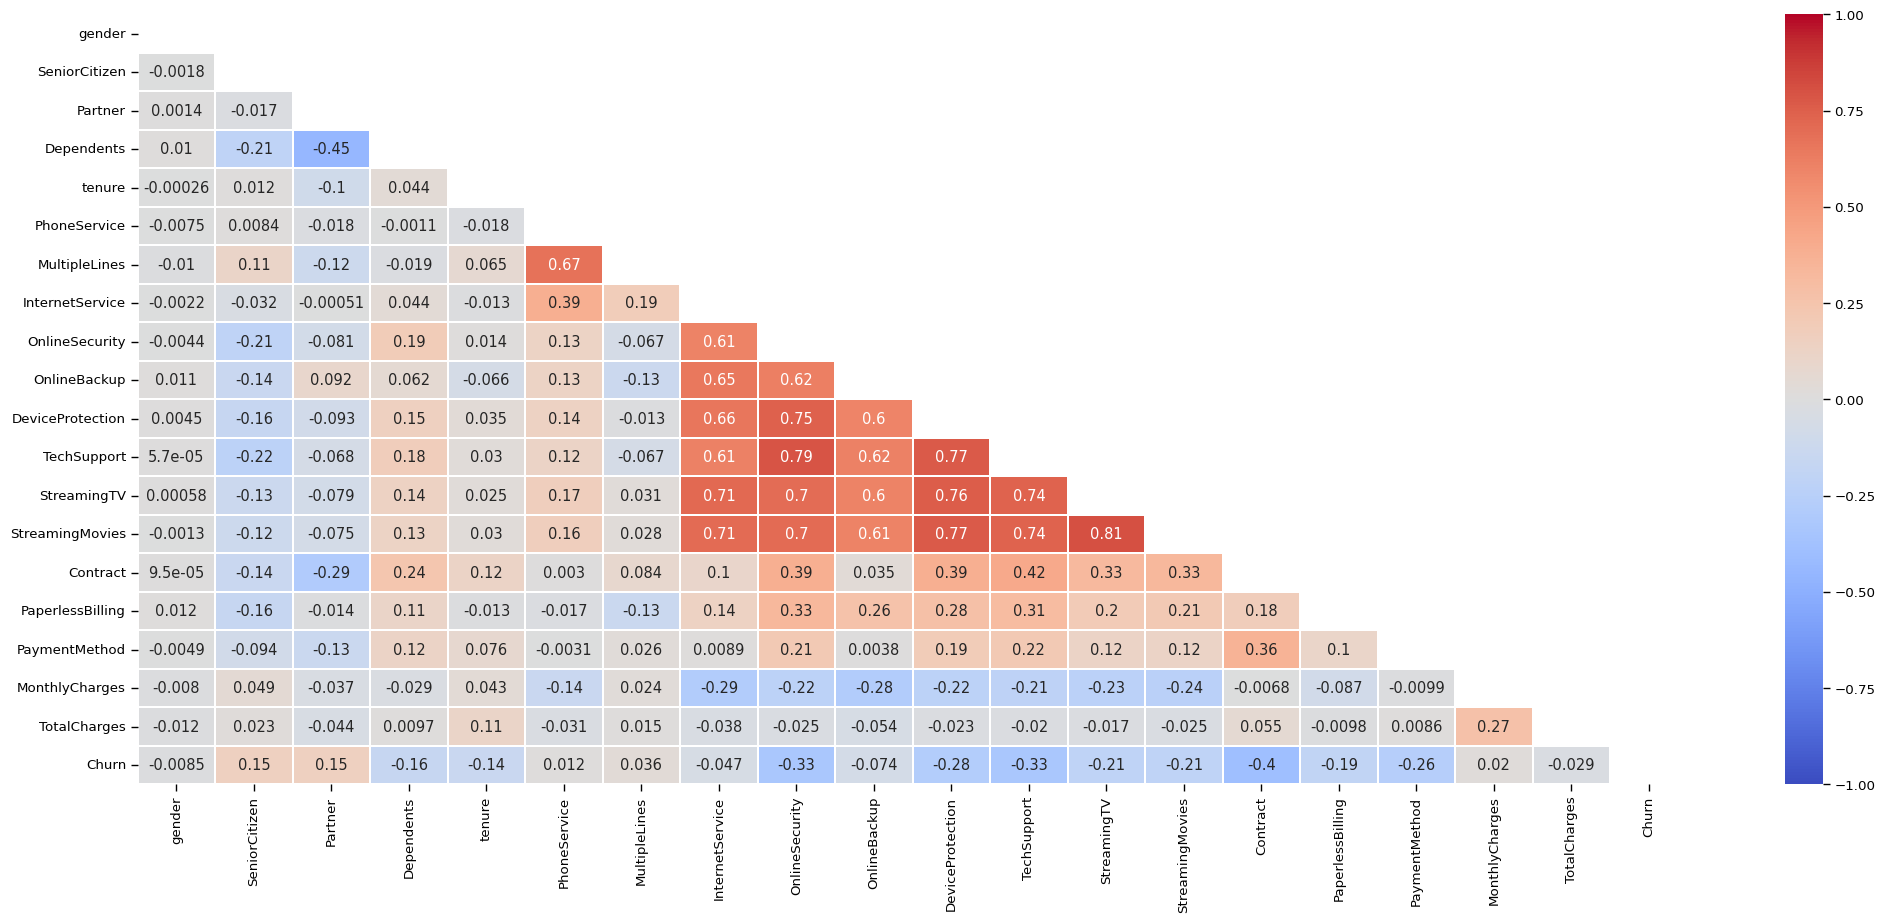

In [52]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [53]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [54]:
df = df.apply(lambda x: object_to_int(x))
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

In [55]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [56]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [58]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

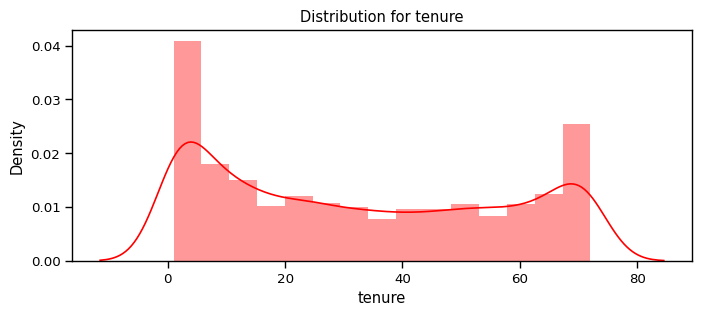

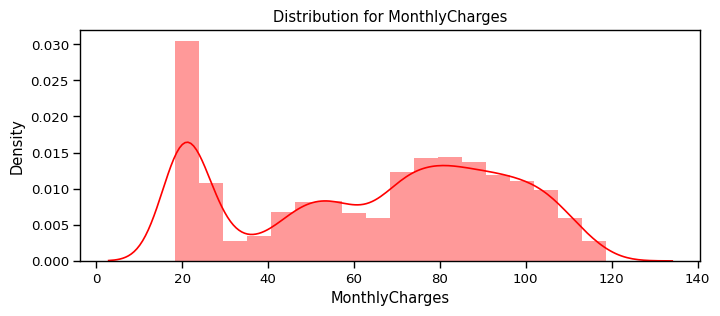

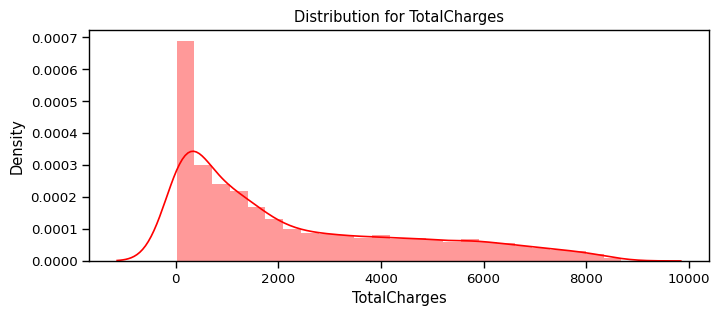

In [59]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

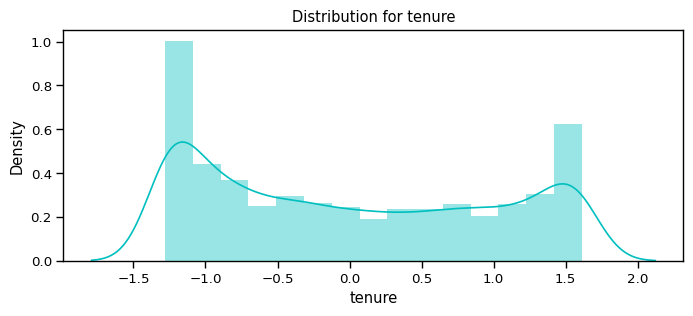

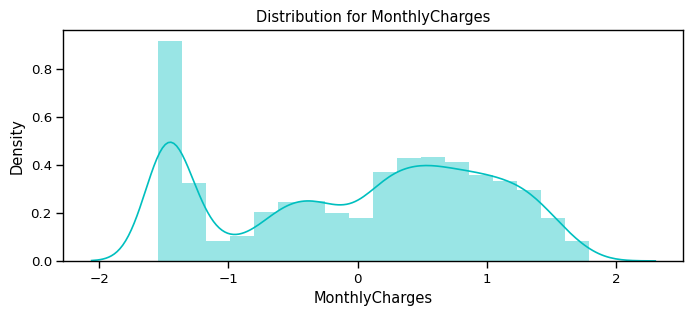

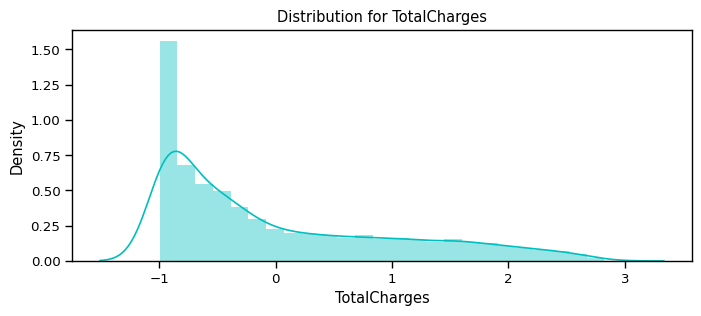

In [60]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, df_std, color='c')

In [61]:
cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [62]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

knn

In [63]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7758293838862559


In [64]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1549
           1       0.59      0.52      0.55       561

    accuracy                           0.78      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



svc

In [65]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.8075829383886256


In [66]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.69      0.50      0.58       561

    accuracy                           0.81      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



random forest

In [67]:
model_rf = RandomForestClassifier(
    n_estimators=500, 
    oob_score=True, 
    n_jobs=-1,
    random_state=50, 
    max_features="sqrt",  # Change 'auto' -> 'sqrt'
    max_leaf_nodes=30
)

model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8137440758293839


In [68]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.71      0.51      0.59       561

    accuracy                           0.81      2110
   macro avg       0.77      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



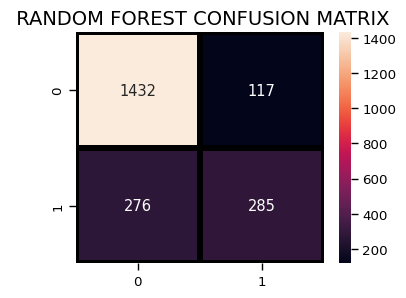

In [69]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

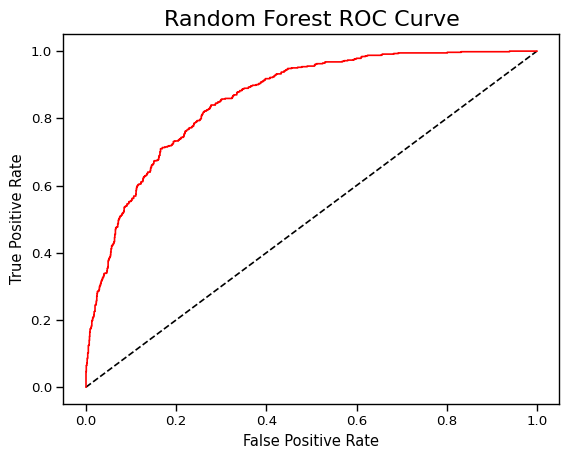

In [70]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

logistic regression

In [71]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8090047393364929


In [72]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1549
           1       0.66      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.80      0.81      0.81      2110



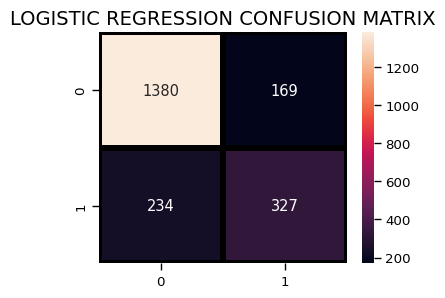

In [73]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

In [74]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

decision tree classifier

In [75]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7246445497630332


In [76]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1549
           1       0.48      0.51      0.50       561

    accuracy                           0.72      2110
   macro avg       0.65      0.66      0.65      2110
weighted avg       0.73      0.72      0.73      2110



Adaboost classifier

In [77]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.8075829383886256

In [78]:
print(classification_report(y_test, a_preds))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



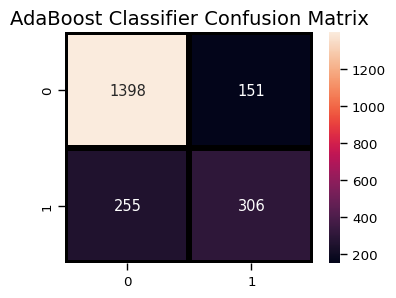

In [79]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

gradient boosting classifier

In [80]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.8075829383886256


In [81]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



In [82]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

voting classifier

In [83]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

Final Accuracy Score 
0.8170616113744076


In [84]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1549
           1       0.68      0.58      0.63       561

    accuracy                           0.82      2110
   macro avg       0.77      0.74      0.75      2110
weighted avg       0.81      0.82      0.81      2110



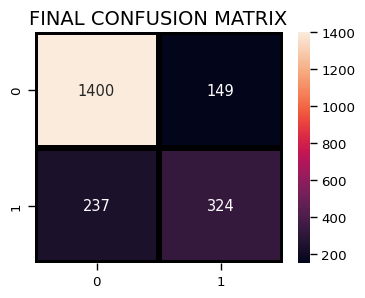

In [85]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

GB,RF,ADAB,SVC==ensemble

In [86]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define base models
base_models = [
    ('gb', GradientBoostingClassifier()),
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)),
    ('ada', AdaBoostClassifier(n_estimators=100)),
    ('svm', SVC(probability=True))
]

# Meta-model: Logistic Regression
meta_model = LogisticRegression()

# Stacking Classifier
stack_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, passthrough=True)

# Train the model
stack_clf.fit(X_train, y_train)

# Make predictions
stack_preds = stack_clf.predict(X_test)

# Evaluate model
accuracy_stack = accuracy_score(y_test, stack_preds)
print(f"Stacking Classifier Accuracy: {accuracy_stack:.4f}")

# Print classification report
print(classification_report(y_test, stack_preds))


Stacking Classifier Accuracy: 0.8128
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1549
           1       0.67      0.59      0.63       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.81      0.81      0.81      2110



In [87]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_preds = xgb_model.predict(X_test)

# Evaluate performance
xgb_accuracy = accuracy_score(y_test, xgb_preds)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print(classification_report(y_test, xgb_preds))


XGBoost Accuracy: 0.7953
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1549
           1       0.63      0.55      0.59       561

    accuracy                           0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110



In [88]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0]
}

# Initialize XGBoost model
xgb = XGBClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters & model evaluation
best_xgb = grid_search.best_estimator_
best_preds = best_xgb.predict(X_test)
best_accuracy = accuracy_score(y_test, best_preds)

print(f"Best XGBoost Accuracy: {best_accuracy:.4f}")
print(f"Best Parameters: {grid_search.best_params_}")
print(classification_report(y_test, best_preds))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best XGBoost Accuracy: 0.8166
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.7}
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1549
           1       0.69      0.56      0.62       561

    accuracy                           0.82      2110
   macro avg       0.77      0.73      0.75      2110
weighted avg       0.81      0.82      0.81      2110



🚀 Enhanced Stacking Classifier


In [89]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=300, max_depth=12, random_state=42)), 
    ('svm', SVC(probability=True, kernel='rbf', C=1.0, gamma='scale')),  
    ('ada', AdaBoostClassifier(n_estimators=150, learning_rate=0.05)),  
    ('gb', GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=5)),  
    ('xgb', XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42))
]

# Meta-model: Logistic Regression
meta_model = LogisticRegression(max_iter=1000, solver='lbfgs')

# Stacking Classifier
stack_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, passthrough=True, n_jobs=-1)

# Train the model
stack_clf.fit(X_train, y_train)

# Make predictions
stack_preds = stack_clf.predict(X_test)

# Evaluate model
accuracy_stack = accuracy_score(y_test, stack_preds)
print(f"Enhanced Stacking Classifier Accuracy: {accuracy_stack:.4f}")

# Print classification report
print(classification_report(y_test, stack_preds))


Enhanced Stacking Classifier Accuracy: 0.8066
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.65      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.75      0.74      0.74      2110
weighted avg       0.80      0.81      0.80      2110



🔥 Hybrid Ensemble Model==Gradient Boosting, Decision Tree, Deep Learning) and clustering (K-Means) using Stacking, Bagging, and Voting

In [90]:
import numpy as np
import pandas as pd
from sklearn.ensemble import StackingClassifier, BaggingClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load dataset (Replace with actual dataset)
# df = pd.read_csv("your_dataset.csv")
# X = df.drop(columns=['Churn'])  # Features
# y = df['Churn']  # Target variable

# Standardizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# 🟢 Step 1: Apply K-Means Clustering (Unsupervised)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)
cluster_labels = kmeans.predict(X_train)

# Append cluster labels as new feature
X_train_clustered = np.hstack((X_train, cluster_labels.reshape(-1, 1)))
X_test_clustered = np.hstack((X_test, kmeans.predict(X_test).reshape(-1, 1)))

# 🔵 Step 2: Define Base Classifiers
gb = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
dt = DecisionTreeClassifier(max_depth=8, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)

# 🟣 Step 3: Stacking Classifier (Combining GB, DT, MLP)
stacking_clf = StackingClassifier(
    estimators=[('gb', gb), ('dt', dt), ('mlp', mlp)],
    final_estimator=LogisticRegression(),
    passthrough=True,
    n_jobs=-1
)

# 🔴 Step 4: Bagging Classifier (Using Decision Tree)
bagging_clf = BaggingClassifier(base_estimator=dt, n_estimators=100, random_state=42, n_jobs=-1)

# 🟡 Step 5: Voting Classifier (Soft Voting)
voting_clf = VotingClassifier(
    estimators=[('stacking', stacking_clf), ('bagging', bagging_clf)],
    voting='soft',
    n_jobs=-1
)

# Train the Final Hybrid Model
voting_clf.fit(X_train_clustered, y_train)

# Predictions
y_pred = voting_clf.predict(X_test_clustered)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Hybrid Ensemble Model Accuracy: {accuracy * 100:.2f}%")

# Classification Report
print(classification_report(y_test, y_pred))


Hybrid Ensemble Model Accuracy: 79.91%
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.65      0.52      0.58       561

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



In [94]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report

# Load dataset (Replace with actual dataset)
# df = pd.read_csv("telecom_churn_malaysia.csv")
# X = df.drop(columns=['Churn'])  # Features
# y = df['Churn']  # Target variable

# Handle class imbalance using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Standardizing data (Needed for KNN, LR, SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# 🔴 **Optimized CART Classifier (Best Model)**
cart_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=3, random_state=42)
cart_model.fit(X_train, y_train)
y_pred_cart = cart_model.predict(X_test)
cart_accuracy = accuracy_score(y_test, y_pred_cart)

# 🟢 **KNN**
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

# 🔵 **Logistic Regression**
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)

# 🟣 **LDA**
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
y_pred_lda = lda_model.predict(X_test)
lda_accuracy = accuracy_score(y_test, y_pred_lda)

# 🟡 **Gaussian Naive Bayes**
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
y_pred_gnb = gnb_model.predict(X_test)
gnb_accuracy = accuracy_score(y_test, y_pred_gnb)

# ⚫ **SVM**
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# 🏆 **Random Forest & AdaBoost for Boosting CART**
rf_model = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

ada_model = AdaBoostClassifier(base_estimator=cart_model, n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)
ada_accuracy = accuracy_score(y_test, y_pred_ada)

# Print Accuracy Scores
print(f"🔴 CART Decision Tree Accuracy: {cart_accuracy * 100:.2f}%")
print(f"🟢 KNN Accuracy: {knn_accuracy * 100:.2f}%")
print(f"🔵 Logistic Regression Accuracy: {lr_accuracy * 100:.2f}%")
print(f"🟣 LDA Accuracy: {lda_accuracy * 100:.2f}%")
print(f"🟡 Gaussian Naïve Bayes Accuracy: {gnb_accuracy * 100:.2f}%")
print(f"⚫ SVM Accuracy: {svm_accuracy * 100:.2f}%")
print(f"🏆 Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print(f"🔥 AdaBoost + CART Accuracy: {ada_accuracy * 100:.2f}%")

# Best Performing Model Report
print("\n🏆 Best Model Classification Report (CART or AdaBoost)")
print(classification_report(y_test, y_pred_cart if cart_accuracy > ada_accuracy else y_pred_ada))


🔴 CART Decision Tree Accuracy: 79.73%
🟢 KNN Accuracy: 78.99%
🔵 Logistic Regression Accuracy: 80.05%
🟣 LDA Accuracy: 79.73%
🟡 Gaussian Naïve Bayes Accuracy: 78.18%
⚫ SVM Accuracy: 81.54%
🏆 Random Forest Accuracy: 82.99%
🔥 AdaBoost + CART Accuracy: 84.44%

🏆 Best Model Classification Report (CART or AdaBoost)
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1549
           1       0.84      0.85      0.85      1549

    accuracy                           0.84      3098
   macro avg       0.84      0.84      0.84      3098
weighted avg       0.84      0.84      0.84      3098



# **AdaBoost + CART (Decision Tree) **# 

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Optimized CART Decision Tree
cart_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=3, random_state=42)

# AdaBoost with CART as base estimator
ada_model = AdaBoostClassifier(base_estimator=cart_model, n_estimators=100, random_state=42)

# Train AdaBoost
ada_model.fit(X_train, y_train)

# Predictions
y_pred_ada = ada_model.predict(X_test)

# Accuracy & Classification Report
ada_accuracy = accuracy_score(y_test, y_pred_ada)
print(f"🔥 AdaBoost + CART Accuracy: {ada_accuracy * 100:.2f}%")
print("\n🏆 Classification Report:")
print(classification_report(y_test, y_pred_ada))
# Save the model to a file
joblib.dump(ada_model, r"C:\Users\akshi\Documents\Varshitha\telco-customer-churn\ada_cart_model.pkl", compress=3)
print("✅ Model saved as 'ada_cart_model.pkl'")



🔥 AdaBoost + CART Accuracy: 84.44%

🏆 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1549
           1       0.84      0.85      0.85      1549

    accuracy                           0.84      3098
   macro avg       0.84      0.84      0.84      3098
weighted avg       0.84      0.84      0.84      3098

✅ Model saved as 'ada_cart_model.pkl'


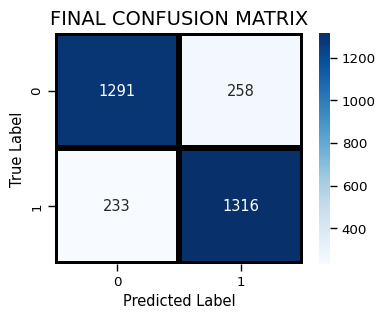

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_ada)

# Plot confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linecolor="k", linewidths=3)

plt.title("FINAL CONFUSION MATRIX", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Show plot
plt.show()


# **************🔥 Optimized AdaBoost****************

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define base model (CART)
cart = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)

# Define AdaBoost model with base CART
adaboost_cart = AdaBoostClassifier(base_estimator=cart, n_estimators=300, learning_rate=0.1)

# Train the model
adaboost_cart.fit(X_train, y_train)

# Make predictions
y_pred = adaboost_cart.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"🔥 Optimized AdaBoost + CART Accuracy: {accuracy:.4%}\n")

# Print classification report
print(classification_report(y_test, y_pred))


🔥 Optimized AdaBoost + CART Accuracy: 83.0536%

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1549
           1       0.82      0.85      0.83      1549

    accuracy                           0.83      3098
   macro avg       0.83      0.83      0.83      3098
weighted avg       0.83      0.83      0.83      3098



# **# **Support Vector Machine (SVM), Random Forest Classifier, Decision Tree Classifier, and Logistic Regression Classifier== Voting Classifier ********

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define base models
svm_model = SVC(probability=True, kernel='rbf', random_state=42)
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
lr_model = LogisticRegression(max_iter=500, random_state=42)

# Create Voting Classifier (Soft Voting for probability-based weighting)
voting_clf = VotingClassifier(
    estimators=[
        ('svm', svm_model),
        ('rf', rf_model),
        ('dt', dt_model),
        ('lr', lr_model)
    ], voting='soft'  # Use 'soft' for weighted probabilities, 'hard' for majority voting
)

# Train the ensemble model
voting_clf.fit(X_train, y_train)

# Predictions
y_pred_voting = voting_clf.predict(X_test)

# Accuracy & Classification Report
voting_accuracy = accuracy_score(y_test, y_pred_voting)
print(f"🔥 Voting Classifier Accuracy: {voting_accuracy * 100:.2f}%")
print("\n🏆 Classification Report:")
print(classification_report(y_test, y_pred_voting))


🔥 Voting Classifier Accuracy: 82.86%

🏆 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1549
           1       0.80      0.87      0.84      1549

    accuracy                           0.83      3098
   macro avg       0.83      0.83      0.83      3098
weighted avg       0.83      0.83      0.83      3098



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Base Model - CART (Decision Tree)
cart_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=3, random_state=42)

# AdaBoost Classifier with CART as base estimator
ada_cart = AdaBoostClassifier(base_estimator=cart_model, n_estimators=100, random_state=42)

# Train the model
ada_cart.fit(X_train, y_train)

# Make predictions
predictions = ada_cart.predict(X_test)

# Evaluate model
accuracy_ada_cart = accuracy_score(y_test, predictions)
print("Final Accuracy Score ")
print(accuracy_ada_cart)

# Print classification report
print("\n🏆 Classification Report:")
print(classification_report(y_test, predictions))


Final Accuracy Score 
0.84151065203357

🏆 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1549
           1       0.84      0.85      0.84      1549

    accuracy                           0.84      3098
   macro avg       0.84      0.84      0.84      3098
weighted avg       0.84      0.84      0.84      3098



In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "AdaBoost + CART": AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=3, random_state=42), n_estimators=100, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(kernel='linear')
}

# Store results
benchmark_results = []

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    # Predictions
    y_pred = model.predict(X_test)
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Store in results
    benchmark_results.append({"Model": name, "Accuracy": round(accuracy * 100, 2)})

# Create and display benchmark table
benchmark_df = pd.DataFrame(benchmark_results)
print("\n🔍 Model Performance Benchmark:")
print(benchmark_df.sort_values(by="Accuracy", ascending=False))



🔍 Model Performance Benchmark:
                 Model  Accuracy
1      AdaBoost + CART     84.15
3    Gradient Boosting     83.51
2        Random Forest     82.99
5                  SVM     80.15
4  Logistic Regression     80.05
0        Decision Tree     79.41


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# List of models
models = {
    "AdaBoost + CART": AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=3), n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    "Decision Tree (CART)": DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=3, random_state=42),
    "SVM": SVC(probability=True),
    "Logistic Regression": LogisticRegression()
}

# Initialize results list
results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    predictions = model.predict(X_test)  # Make predictions

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    # Append results
    results.append([name, accuracy, precision, recall, f1])

# Create a Pandas DataFrame
df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])

# Print the benchmark table
print(df_results)


                  Model  Accuracy  Precision    Recall  F1-score
0       AdaBoost + CART  0.841511   0.836086  0.849580  0.842779
1     Gradient Boosting  0.823757   0.800120  0.863138  0.830435
2         Random Forest  0.831181   0.808293  0.868302  0.837224
3  Decision Tree (CART)  0.797611   0.768961  0.850872  0.807846
4                   SVM  0.815365   0.807426  0.828276  0.817718
5   Logistic Regression  0.800516   0.772382  0.852163  0.810313


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import joblib

# Load and clean data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.drop(['customerID'], axis=1, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)
df = df[df['tenure'] > 0]
df["SeniorCitizen"] = df["SeniorCitizen"].map({0: "No", 1: "Yes"})

# Label encode all columns
def object_to_int(series):
    if series.dtype == 'object':
        return LabelEncoder().fit_transform(series)
    return series

df = df.apply(object_to_int)

# Prepare features
X = df.drop(columns=['Churn'])
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Scale numerical
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train AdaBoost with CART
cart_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=3, random_state=42)
ada_model = AdaBoostClassifier(base_estimator=cart_model, n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

# Save the model and scaler
joblib.dump(ada_model, "ada_cart_model.pkl", compress=3)
joblib.dump(scaler, "scaler.pkl")
print("✅ Model and scaler saved!")


✅ Model and scaler saved!


In [101]:
import joblib
from sklearn.preprocessing import StandardScaler

# Load the model
model = joblib.load("ada_cart_model.pkl")

# Get original training columns used in the model
# You'll need to replace this with your actual training data columns after encoding
# Or, save and load the column names during training
training_df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Select relevant columns
features = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'
]
X_train_raw = training_df[features]

# Preprocess training data the same way (for column reference)
X_train_encoded = pd.get_dummies(X_train_raw, drop_first=True)
training_columns = X_train_encoded.columns  # Save this for new input alignment

# 🔮 Prediction Function
def predict_churn(new_input_df):
    # Step 1: One-hot encode new input
    encoded_input = pd.get_dummies(new_input_df, drop_first=True)
    
    # Step 2: Align columns with training data
    for col in training_columns:
        if col not in encoded_input.columns:
            encoded_input[col] = 0
    encoded_input = encoded_input[training_columns]  # Ensure column order matches
    
    # Step 3: Scale the input
    scaler = StandardScaler()
    input_scaled = scaler.fit_transform(encoded_input)

    # Step 4: Predict
    prediction = model.predict(input_scaled)[0]
    probability = model.predict_proba(input_scaled)[0][1]
    
    return prediction, probability


In [102]:
# Example new customer
new_customer = pd.DataFrame([{
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 5,
    'PhoneService': 'Yes',
    'MultipleLines': 'No',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 70.35,
    'TotalCharges': 350.5
}])

# Predict
prediction, prob = predict_churn(new_customer)
print("Prediction:", "Churn" if prediction == 1 else "No Churn")
print(f"Probability of Churn: {prob:.2%}")


ValueError: X has 6559 features, but AdaBoostClassifier is expecting 19 features as input.